## IS445 ASSIGNMENT 2

Using matplotlib, construct a visualization of the Illinois Building Inventory that communicates the following information:

- Relationship between the year acquired and the year constructed
- Total square footage as a function of congressional district
- Average square footage per floor as a function of congressional district
- Square footage for the five most common departments as a function of year

Each component will be worth 5 points and must be a completely communicative visualization -- including labels and a one paragraph writeup of successes and shortcomings in your approach. Submit a notebook to Moodle. All source code must be in these files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Read the data
df = pd.read_csv("./building_inventory.csv")

## Data Preprocessing
- Remove all missing data across the table

- Number of rows before removing NaN: 8862
- Number of rows after removing NaN: 8556

In [3]:
# Print all column names
for col in df.columns:
    print(col)

Agency Name
Location Name
Address
City
Zip code
County
Congress Dist
Congressional Full Name
Rep Dist
Rep Full Name
Senate Dist
Senator Full Name
Bldg Status
Year Acquired
Year Constructed
Square Footage
Total Floors
Floors Above Grade
Floors Below Grade
Usage Description
Usage Description 2
Usage Description 3


In [4]:
df.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


In [5]:
len(df)

8862

In [6]:
#Remove all missing values
df.dropna(inplace=True)

In [7]:
len(df)

8556

## Q1

Relationship between the year acquired and the year constructed

In [8]:
df['Year Constructed'].isna().sum()

0

In [9]:
df['Year Acquired'].isna().sum()

0

In [10]:
df['Year Constructed'].value_counts()

2000    263
0       252
1935    235
1970    215
1987    200
       ... 
1853      1
1843      1
1867      1
1883      1
1838      1
Name: Year Constructed, Length: 175, dtype: int64

In [11]:
df['Year Acquired'].value_counts()

2000    355
1975    238
0       221
1935    214
1970    212
       ... 
1859      1
1874      1
1853      1
1837      1
1843      1
Name: Year Acquired, Length: 168, dtype: int64

In [12]:
# Remove 0's - indicates that there's no year value
to_drop = []
for i in df.index:
    if df.loc[i, "Year Acquired"] == 0 or df.loc[i, "Year Constructed"] == 0:
        to_drop.append(i)

df_years = df.drop(index=to_drop, axis=0)

Text(0, 0.5, 'YEAR CONSTRUCTED')

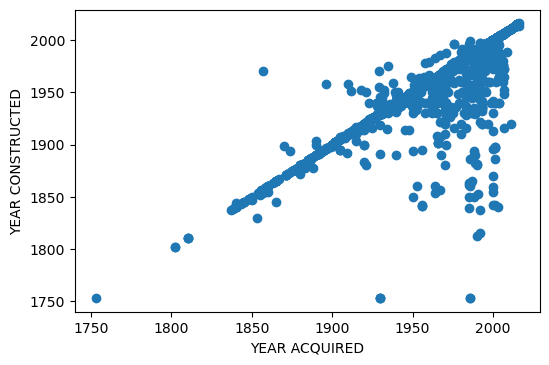

In [13]:
fig, ax = plt.subplots(dpi = 100)
ax.scatter(df_years['Year Acquired'], df_years['Year Constructed'])
ax.set_xlabel("YEAR ACQUIRED")
ax.set_ylabel("YEAR CONSTRUCTED")

## Q1 Answer
- **Preprocessing** - Removing Year_X entries with value 0 - it doesn't make sense to have year = 0, hence it is removed.
- The relationship between year acquired and year constructed is almost linear - most buildings were acquired and constructed the same year.
- There are a few data points which indicate that the building was acquired before construction - which does not make sense since the building wouldn't have been constructed so it cannot be acquired if it doesn't exist. This is assuming we are talking about "Year of acquiring a building". If it is talking about "Year land was acquired" by a department, the relationship will make sense.
- There are some buildings that were acquired AFTER it was constructed (points that lie below the straight line) - which makes sense as a building can be acquired after it exists. This is assuming we are talking about "Year of acquiring a building".
- Shortcomings: the data is not clean enough - there are some outliers, which might make the visualization hard to inrerpret.

## Q2
Total square footage as a function of congressional district

In [14]:
footage_per_district = df.groupby("Congress Dist")["Square Footage"].sum()

In [15]:
footage_per_district

Congress Dist
1      2347969
2      6077683
3      1293687
4       311021
5      1809022
6       145659
7      9199651
8      1457719
9        77978
10      923441
11     3467894
12    12300813
13    30918613
14      856288
15     7058617
16     8704041
17     4317879
18     8103266
Name: Square Footage, dtype: int64

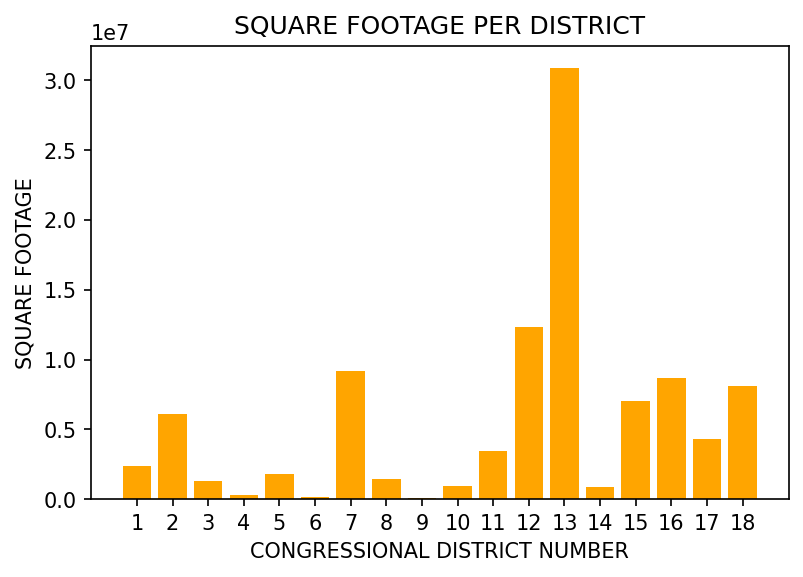

In [16]:
fig, ax = plt.subplots(dpi=150)
ax.bar(footage_per_district.index, footage_per_district, color='orange')
ax.set_title("SQUARE FOOTAGE PER DISTRICT")
ax.set_xlabel("CONGRESSIONAL DISTRICT NUMBER")
ax.set_ylabel("SQUARE FOOTAGE")
ax.set_xticks(footage_per_district.index);

## Q2 Answer

- total square footage as a function of Congressional district => total square footage per congressional district.
- The plot I've chosen is a bar plot - with total square footage (sum) is in the y-axis and district number is in the x-axis
- We can see that District 13 has the highest total square footage of land when compared to all districts.
- The dataframe was grouped by district number and sum of square footage was taken.
- One thing that is not too inrerpretable here is the values for districts 4, 6 and 9. If it was an interactive graph, it would've been easier to inrerpret.


## Q3
Average square footage per floor as a function of congressional district

Columns: Square Footage, Congress Dist, Total Floors

X-axis - district number
Y-axis - avg square footage per floor

In [17]:
df_floors = df.groupby("Congress Dist")[['Square Footage', 'Total Floors']].sum()

In [18]:
df_floors['Average Square Footage per floor'] = round(df_floors['Square Footage'] / df_floors['Total Floors'], 2)

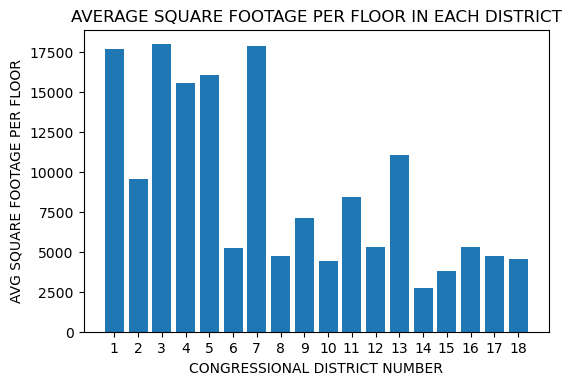

In [19]:
fig, ax = plt.subplots(dpi=100)
ax.bar(df_floors.index, df_floors['Average Square Footage per floor'])
ax.set_title("AVERAGE SQUARE FOOTAGE PER FLOOR IN EACH DISTRICT")
ax.set_xlabel("CONGRESSIONAL DISTRICT NUMBER")
ax.set_ylabel("AVG SQUARE FOOTAGE PER FLOOR")
ax.set_xticks(df_floors.index);

## Q3 Answer

- The dataframe was grouped by district and two variables - square footage and total floors - were filtered out and summed. This gives us the total square footage and total number of floors that fall under one district.
- Average square footage per floor was done by dividing the total footage by total floors for a district.
- I've used a bar plot to represent this data. We can see that Districts 1, 3 and 7 have similar average square footage per floor.

## Q4
Square footage for the five most common departments as a function of year

3 variables - square footage, dept name and year

### What I've done
1. Get the 5 most common departments based on how many times it appears in the table
2. Filter out the 5 most common departments
3. Remove rows with year = 0
4. Take both year columns - year acquired and year constructed - and plot separately for each district
5. One plot was made for each department
6. Each plot has the total (sum) square footage per year for that department for year acquired and year constructed

In [20]:
df["Agency Name"].value_counts()[0:5]

Department of Natural Resources    3198
Department of Corrections          1427
Department of Transportation       1055
Department of Human Services        530
University of Illinois              524
Name: Agency Name, dtype: int64

## Top 5 Departments

| DEPARTMENT NAME | COUNTS |
| :----------------| :-----|
| Department of Natural Resources | 3198 |
| Department of Corrections | 1427 |
| Department of Transportation | 1055 |
| Department of Human Services | 530 |
| University of Illinois | 524 |

In [21]:
def remove_zero_years(df, column_name):
    to_drop = []
    for i in df.index:
        if df.loc[i, column_name] == 0:
            to_drop.append(i)
    return df.drop(to_drop)

In [22]:
# Figuring out 5 most common departments
lst_depts = [dept for dept in df["Agency Name"].value_counts()[0:5].index]
df_top5 = df[df["Agency Name"].isin(lst_depts)]

In [23]:
# Get min and max of year acquired 
min_acq = remove_zero_years(df_top5, 'Year Acquired')['Year Acquired'].min()
max_acq = remove_zero_years(df_top5, 'Year Acquired')['Year Acquired'].max()

acq_index = list(range(min_acq, max_acq+10, 10))

In [24]:
acq_index

[1840,
 1850,
 1860,
 1870,
 1880,
 1890,
 1900,
 1910,
 1920,
 1930,
 1940,
 1950,
 1960,
 1970,
 1980,
 1990,
 2000,
 2010,
 2020]

In [25]:
dept_colors = {}
colors = ['orange', 'red', 'green', 'blue', 'black']
for i in range(5):
    dept_colors[lst_depts[i]] = colors[i]

## Total Square footage as a function of YEAR ACQUIRED for each top 5 department

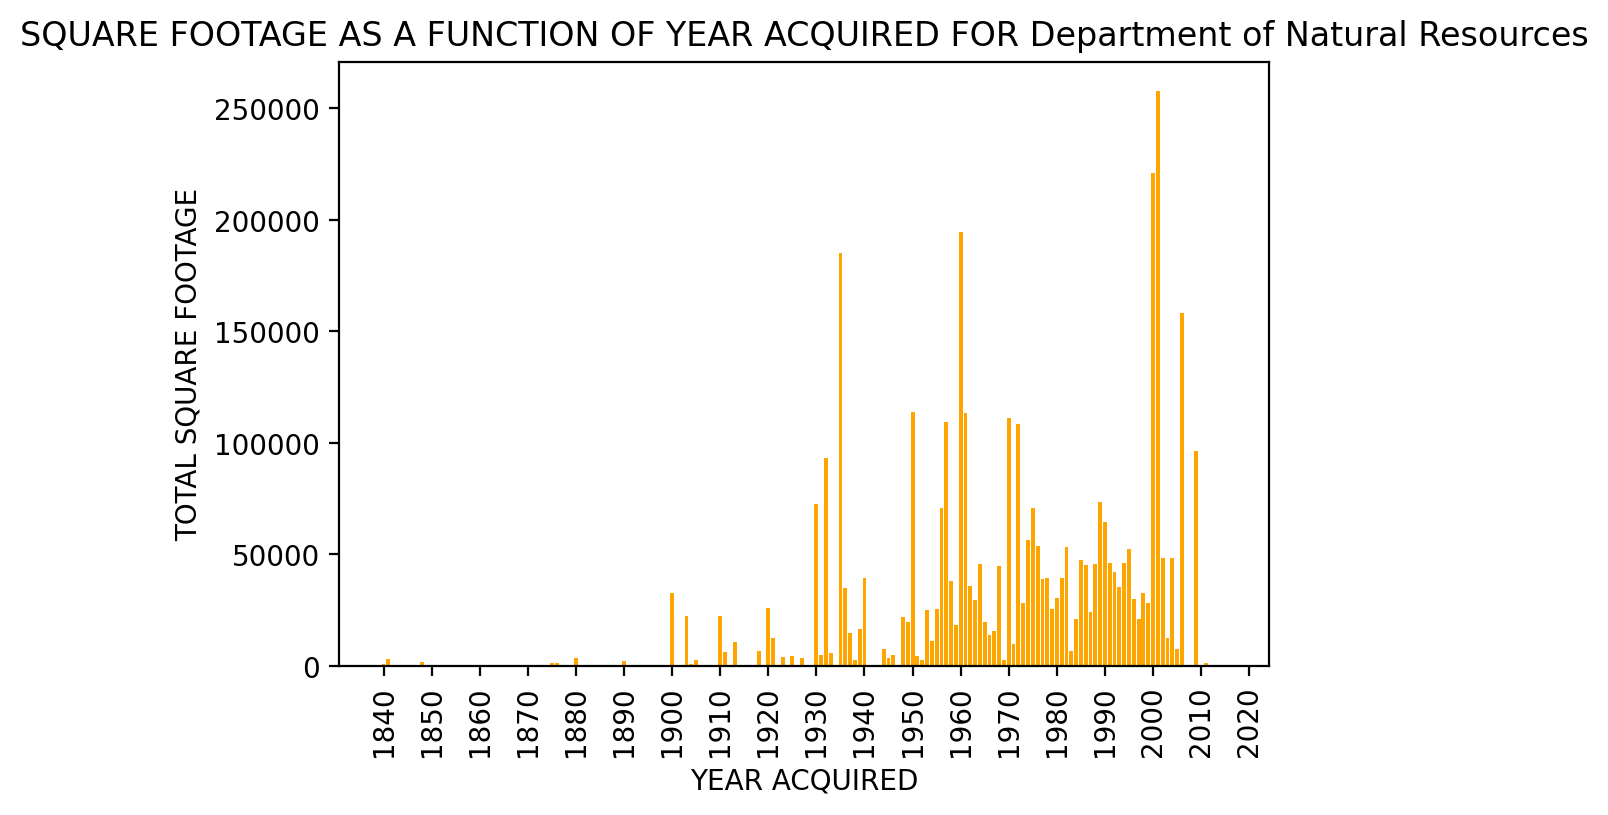

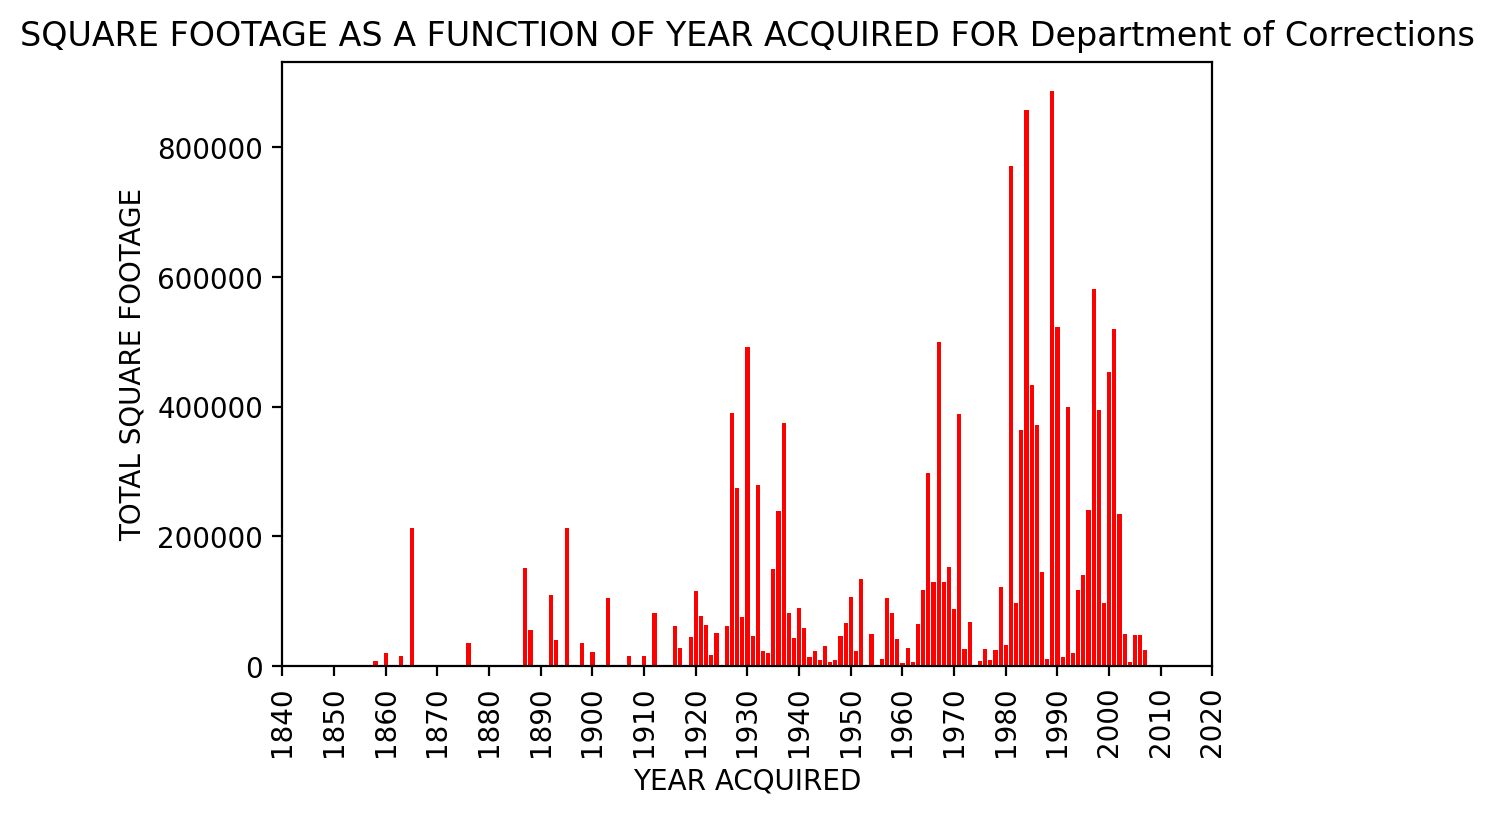

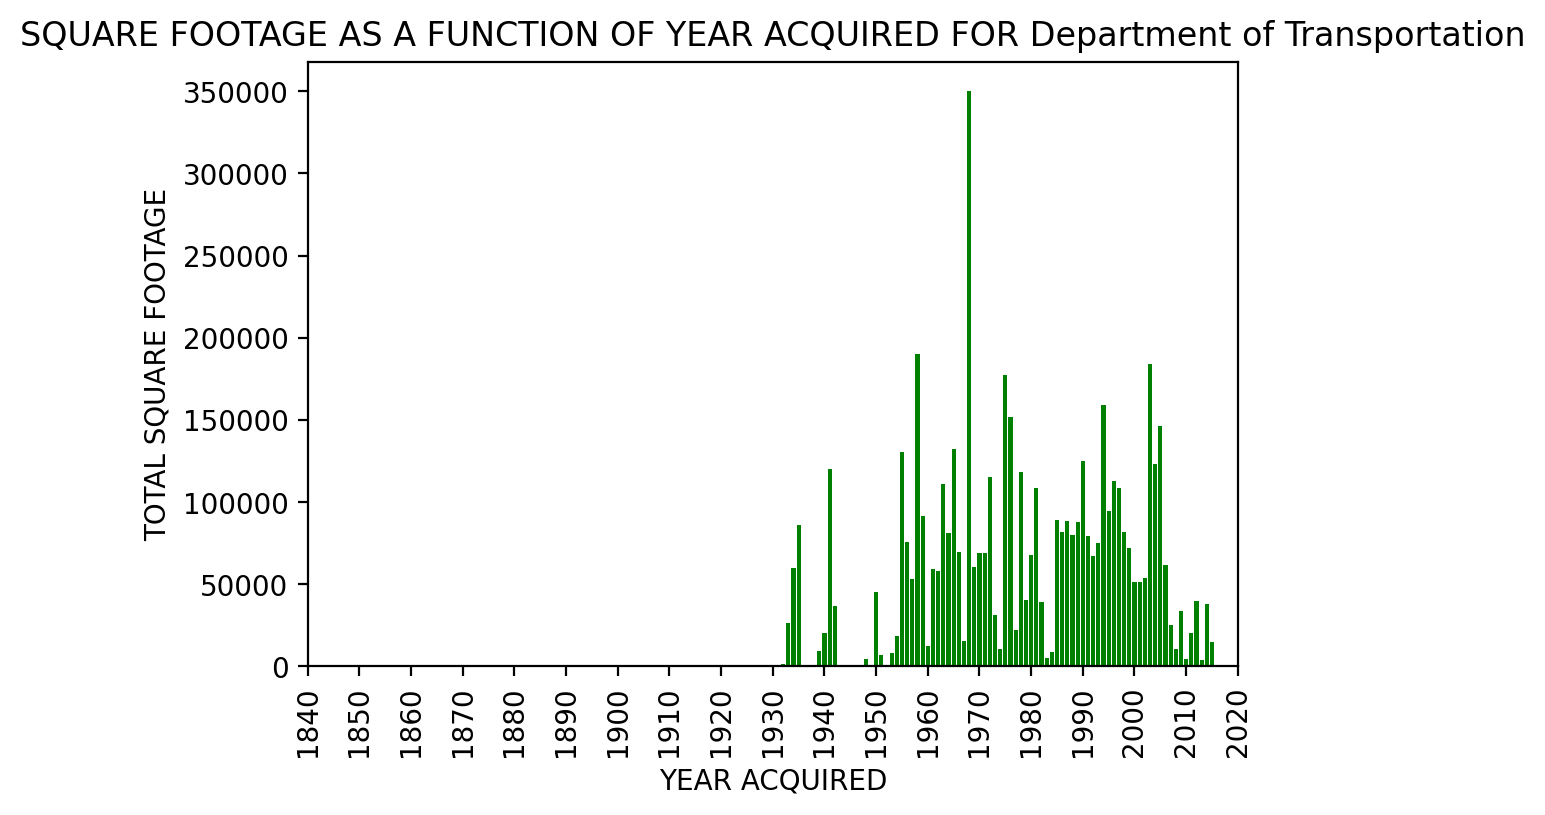

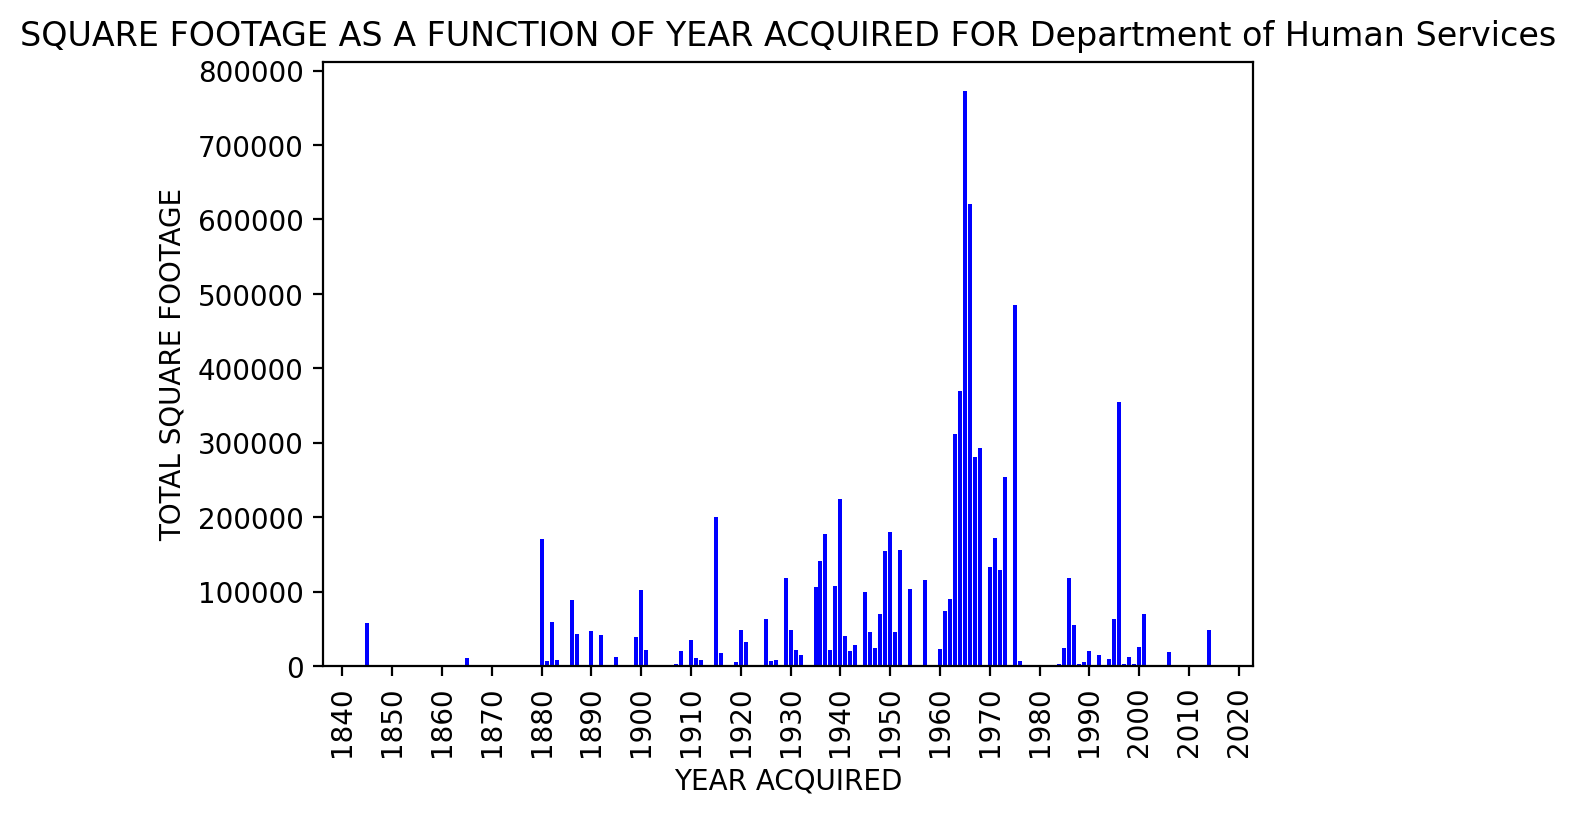

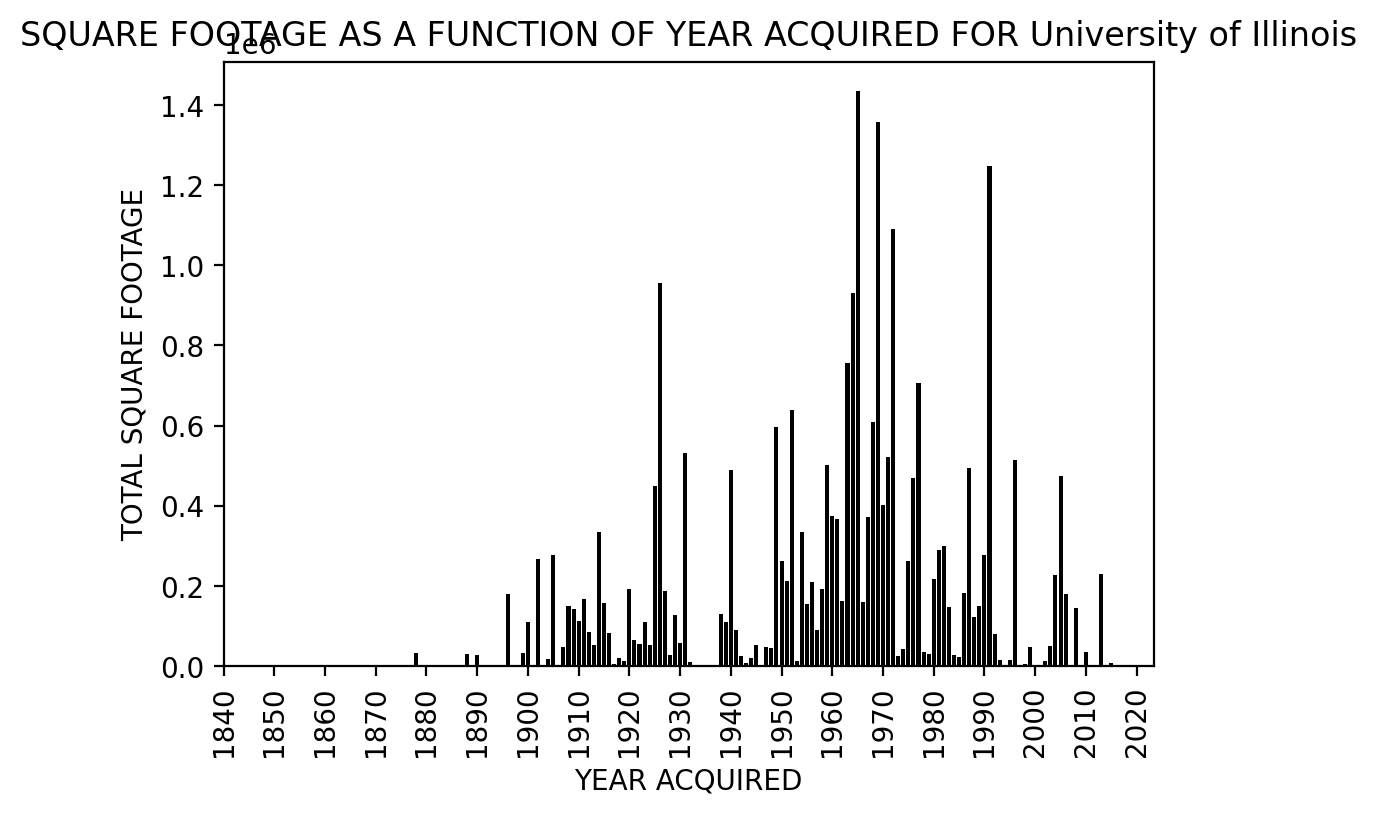

In [26]:
for dept in lst_depts:
    
    #Filter each department
    df_top5_each = df_top5[df_top5['Agency Name'] == dept]
    
    #Remove year acquired values if 0
    df_top5_each = remove_zero_years(df_top5_each, "Year Acquired")
    
    #Group by Year acquired
    df_top5_each = df_top5_each.groupby("Year Acquired").sum()['Square Footage']
    
    
    fig, ax = plt.subplots(dpi=200)

    ax.bar(df_top5_each.index, df_top5_each, color=dept_colors[dept])
    ax.set_xticks(acq_index)
    ax.set_xlabel("YEAR ACQUIRED")
    ax.set_ylabel("TOTAL SQUARE FOOTAGE")
    ax.set_xticklabels(acq_index, rotation=90)
    ax.set_title("SQUARE FOOTAGE AS A FUNCTION OF YEAR ACQUIRED FOR " + dept)

## Total Square footage as a function of YEAR CONSTRUCTED for each top 5 department

In [27]:
# Get min and max of year constructed 
min_con = remove_zero_years(df_top5, 'Year Constructed')['Year Constructed'].min()
max_con = remove_zero_years(df_top5, 'Year Constructed')['Year Constructed'].max()

con_index = list(range(min_con, max_con+10, 10))

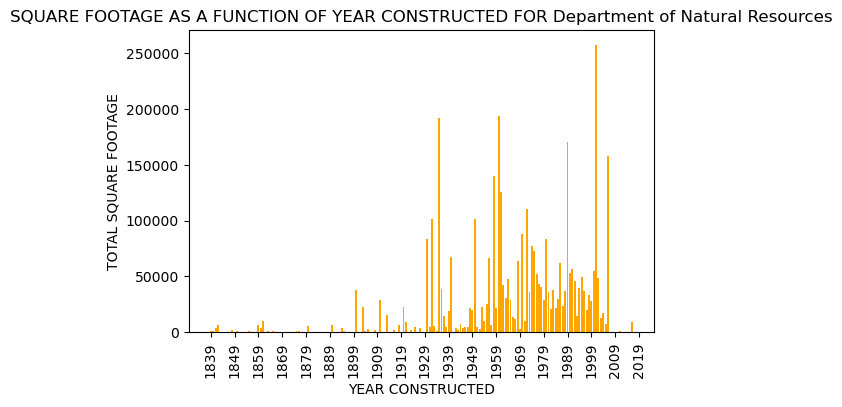

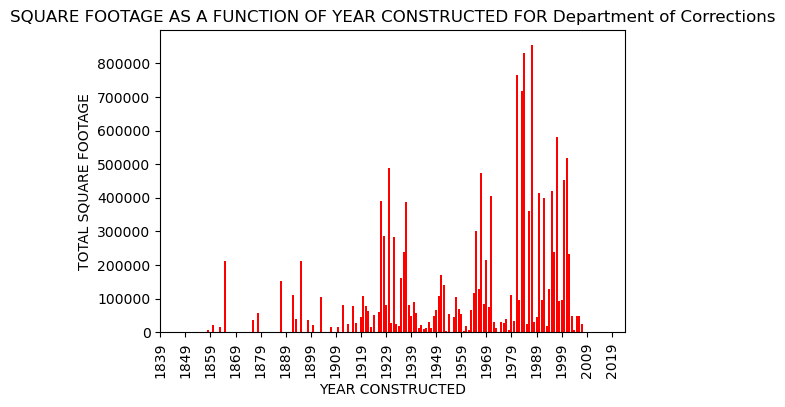

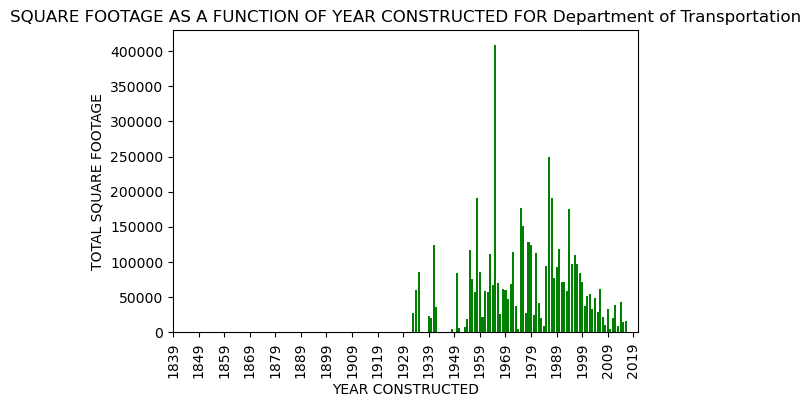

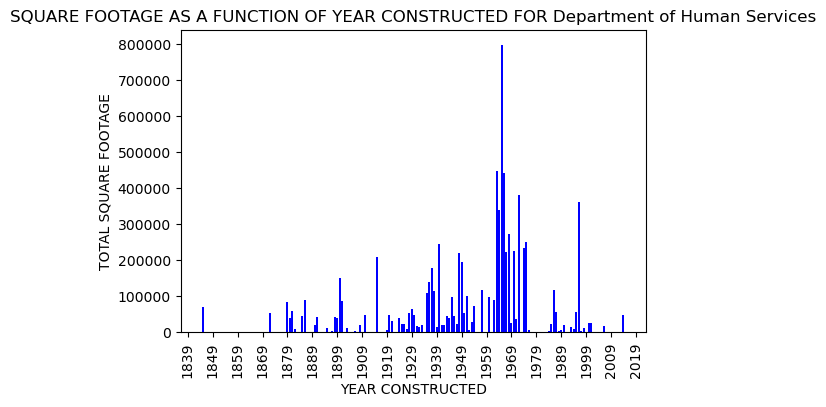

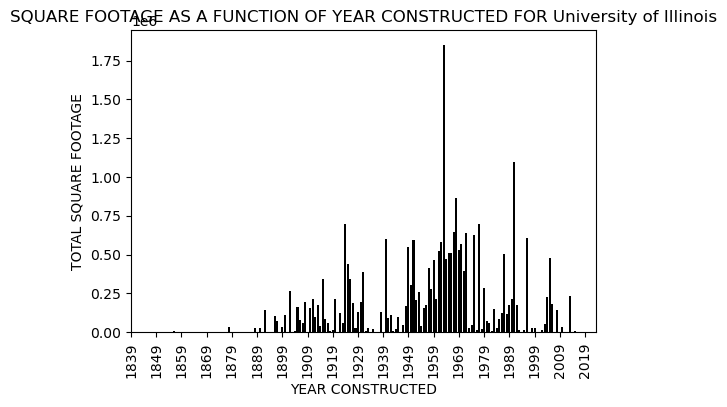

In [28]:
for dept in lst_depts:
    
    df_top5_each = df_top5[df_top5['Agency Name'] == dept]
    df_top5_each = remove_zero_years(df_top5_each, "Year Constructed")
    df_top5_each = df_top5_each.groupby("Year Constructed").sum()['Square Footage']
    
    fig, ax = plt.subplots(dpi=100)
    ax.bar(df_top5_each.index, df_top5_each, color=dept_colors[dept])
    ax.set_xlabel("YEAR CONSTRUCTED")
    ax.set_ylabel("TOTAL SQUARE FOOTAGE")
    ax.set_xticks(con_index)
    ax.set_xticklabels(con_index, rotation=90)
    ax.set_title("SQUARE FOOTAGE AS A FUNCTION OF YEAR CONSTRUCTED FOR " + dept)

## Q4 Answer

- The plot I chose is a bar plot - since the square footage change is shown across a time period, I figured it'd be appropriate.
- I chose both years - Year Acquired and Year Constructed and plotted them separately for each of the top 5 congresional districts.
- We can see that the trend varies for both the variables - the square footage acquired and constructed. For example: the total square footage acquired for years between 2000 and 2010 for Department of Natural Resources has a lot of variations. The first few years we can see there is a lot of square footage acquired and it declines as we get closer to 2010. Similar observations can be made across all years for both the years.
- I've made the axes uniform across all 5 common departments for year acquired and year constructed.
- Shortcomings: the y-axis scales are harder to interpret for some plots due to the 1e6 getting hidden behind the title.